# Deep Learning Fundamentals - Logistic Regression

# Task 1: Introduction

In [3]:
import random
import numpy as np
import warnings
import helpers.plt, helpers.dataset
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

print('Libraries imported')

Libraries imported


# Task 2: Hyperparameters

In [4]:
lr = 0.3
batch_size = 300
iterations = 40

# Task 3: Dataset

In [5]:
(X_train, Y_train), (X_test, Y_test) = helpers.dataset.get_data()

Loading data..
11493376/11490434 [==============================] - 30s 3us/step
Done.


In [6]:
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (12665, 28, 28)
Shape of Y_train: (12665,)
Shape of X_test: (2115, 28, 28)
Shape of Y_test: (2115,)


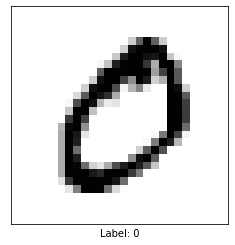

In [7]:
helpers.plt.show_example(X_train[0], Y_train[0])

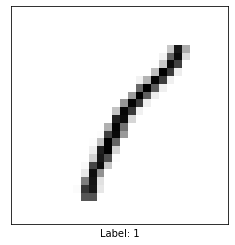

In [8]:
helpers.plt.show_example(X_train[-1], Y_train[-1])

# Task 4: A Mini Batch of Examples

X_batch shape: (1, 784)


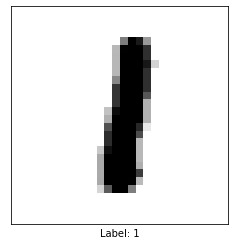

In [9]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_train, Y_train, 1)
print('X_batch shape:', X_batch.shape)
helpers.plt.show_example(X_batch[0], Y_batch[0])

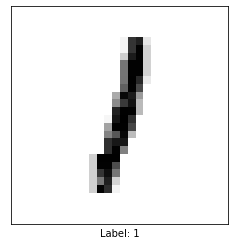

In [10]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_test, Y_test, 1)
helpers.plt.show_example(X_batch[0], Y_batch[0])

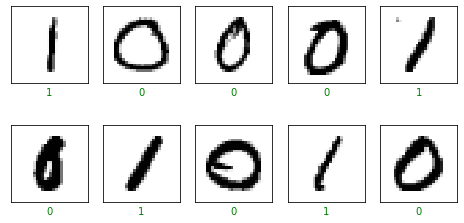

In [11]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_train, Y_train, 10)
helpers.plt.show_ten_examples(X_batch, Y_batch, Y_batch)

# Task 5: Create Model

In [12]:
class LogisticModel:
    def __init__(self, num_features):
        self.W = np.reshape(np.random.randn((num_features)), (num_features, 1))
        self.b = np.zeros((1, 1))
        self.num_features = num_features
        self.losses = []
        self.accuracies = []
        
    def summary(self):
        print('=================================')
        print('Number of features:', self.num_features)
        print('Shape of weights:', self.W.shape)
        print('Shape of biases:', self.b.shape)
        print('=================================')
        
model = LogisticModel(num_features=784)
model.summary()

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)


# Task 6: Forward Pass

In [13]:
class LogisticModel(LogisticModel):
    def _forward_pass(self, X, Y=None):
        batch_size = X.shape[0]
        Z = np.dot(X, self.W) + self.b
        A = 1. / (1. + np.exp(-Z))
        loss = float(1e5)
        if Y is not None:
            loss = -1 * np.sum(np.dot(np.transpose(Y), np.log(A)) + \
                           np.matmul(np.transpose(1-Y), np.log(1-A)))
            loss /= batch_size
        return A, loss

# Task 7: Backward Pass

In [14]:
class LogisticModel(LogisticModel):
    def _backward_pass(self, A, X, Y):
        batch_size = X.shape[0]
        dZ = A - Y
        dW = np.dot(np.transpose(X), dZ)/batch_size
        db = np.sum(dZ)/batch_size
        return dW, db

# Task 8: Update Parameters

In [15]:
class LogisticModel(LogisticModel):
    def _update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

# Task 9: Check Model Performance

In [16]:
class LogisticModel(LogisticModel):
    def predict(self, X, Y=None):
        A, loss = self._forward_pass(X, Y)
        Y_hat = A > 0.5
        return np.squeeze(Y_hat), loss
    
    def evaluate(self, X, Y):
        Y_hat, loss = self.predict(X, Y)
        accuracy = np.sum(Y_hat == np.squeeze(Y)) / X.shape[0]
        return accuracy, loss

In [17]:
model = LogisticModel(num_features=784)

model.summary()
X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
acc, loss = model.evaluate(X, Y)
print('Untrained model accuracy: {}, loss:{}'.format(acc, loss))

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)
Untrained model accuracy: 0.37666666666666665, loss:3.0367494064935334


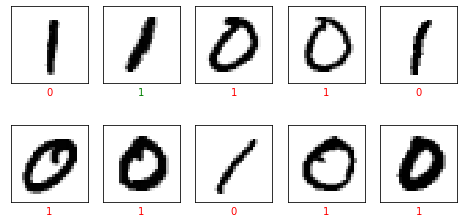

In [18]:
X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
preds, _ = model.predict(X)
helpers.plt.show_ten_examples(X, Y, preds)

# Task 10: Training Loop

In [19]:
class LogisticModel(LogisticModel):
    def train(self, batch_size, get_batch, lr, iterations, X_train, Y_train, X_test, Y_test):

        print('Training..')
        self.accuracies = []
        self.losses = []
        
        for i in range(0, iterations):
            X, Y = get_batch(X_train, Y_train, batch_size)
            A, _ = self._forward_pass(X, Y)  
            dW, db = self._backward_pass(A, X, Y)
            self._update_params(dW, db, lr)
            
            X, Y = get_batch(X_test, Y_test, batch_size)
            val_acc, val_loss = self.evaluate(X, Y)
            self.accuracies.append(val_acc)
            self.losses.append(val_loss)
            
            print('Iter: {}, Val Acc: {:.3f}, Val Loss: {:.3f}'.format(i, val_acc, val_loss))
            
        print('Training finished.')

# Task 11: Training the Model

In [20]:
model = LogisticModel(num_features=784)

X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
print('Before training performance:', model.evaluate(X, Y))
model.train(
    batch_size,
    helpers.dataset.get_random_batch,
    lr,
    iterations,
    X_train, Y_train,
    X_test, Y_test
)
print('After training performance:', model.evaluate(X, Y))

Before training performance: (0.81, 0.9901280444339426)
Training..
Iter: 0, Val Acc: 0.800, Val Loss: 0.823
Iter: 1, Val Acc: 0.817, Val Loss: 0.650
Iter: 2, Val Acc: 0.850, Val Loss: 0.568
Iter: 3, Val Acc: 0.863, Val Loss: 0.488
Iter: 4, Val Acc: 0.880, Val Loss: 0.494
Iter: 5, Val Acc: 0.920, Val Loss: 0.256
Iter: 6, Val Acc: 0.933, Val Loss: 0.255
Iter: 7, Val Acc: 0.937, Val Loss: 0.232
Iter: 8, Val Acc: 0.940, Val Loss: 0.292
Iter: 9, Val Acc: 0.947, Val Loss: 0.203
Iter: 10, Val Acc: 0.943, Val Loss: 0.142
Iter: 11, Val Acc: 0.930, Val Loss: 0.261
Iter: 12, Val Acc: 0.937, Val Loss: 0.200
Iter: 13, Val Acc: 0.957, Val Loss: 0.120
Iter: 14, Val Acc: 0.970, Val Loss: 0.144
Iter: 15, Val Acc: 0.953, Val Loss: 0.142
Iter: 16, Val Acc: 0.953, Val Loss: 0.211
Iter: 17, Val Acc: 0.957, Val Loss: 0.150
Iter: 18, Val Acc: 0.960, Val Loss: 0.147
Iter: 19, Val Acc: 0.980, Val Loss: 0.076
Iter: 20, Val Acc: 0.963, Val Loss: 0.129
Iter: 21, Val Acc: 0.950, Val Loss: 0.143
Iter: 22, Val Acc: 

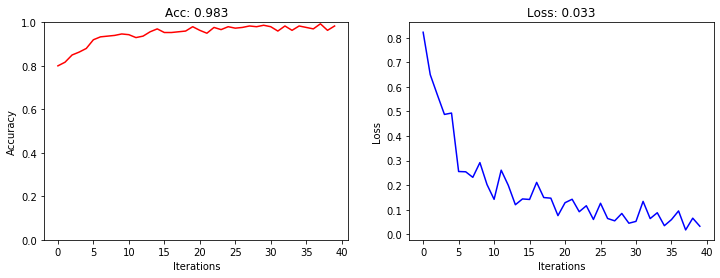

In [21]:
helpers.plt.plot_metrics(model)

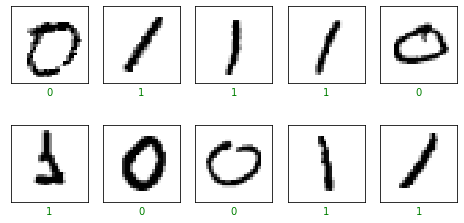

In [22]:
X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
preds, _ = model.predict(X)
helpers.plt.show_ten_examples(X, Y, preds)